# Aula Prática De Encoder - Dataset Insurance

In [1]:
## carregando pacotes de nmanipulacao

import pandas as pd
import numpy as np

In [2]:
## carregando dataset

insurance = pd.read_csv('medical_insurance.csv')

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


## Separando As Features

In [4]:
## categorical = insurance.select_dtypes(include='O').columns.tolist()

## numerical = insurance.select_dtypes(include=np.number).columns.tolist()

## Testando formato com list comprehension

numerical = [col for col in insurance.columns
            if insurance[col].dtype !='O'
            and col != 'charges']

categorical = [col for col in insurance.columns
              if insurance[col].dtype == 'O']

In [6]:
target = 'charges'

In [8]:
X = insurance[numerical + categorical]
y = insurance[target]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [11]:
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression ##Rodar uma Regressao
from sklearn.metrics import mean_absolute_error

## Encoder

In [12]:
encoder = TargetEncoder(cols = categorical)

In [14]:
X_train = encoder.fit_transform(X_train, y_train)  ## treino - por isso o 'fit'
X_test = encoder.transform(X_test)

## Treinar Modelo - Regressão

In [16]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = lr_model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

MAE: 4168.995734609701


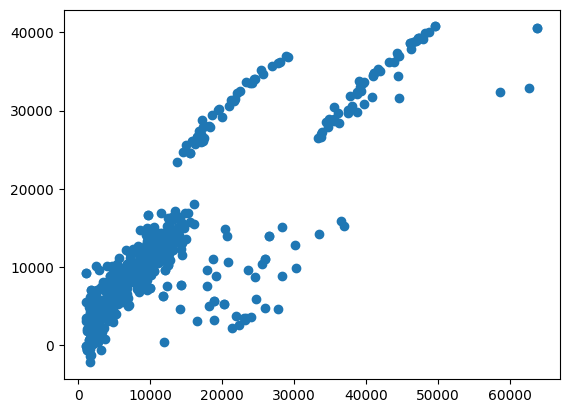

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)